<div class="alert alert-block alert-info">
    Predicting 'Life expectancy' from The Life Expectancy dataset from the World Health Organization (WHO)<br>
    <br>
____________________________________________________________________________________
</div>

<div class="alert alert-block alert-info">
    Importing necessary modules
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


<div class="alert alert-block alert-info">
    Reading the dataset and printing the first few rows to get an idea about the information
</div>

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<div class="alert alert-block alert-success">
    As we can see the 'Life expectancy' is given in the dataset and is a continous variable with numerical values. Due to this our machine learning model should be a regression model with supervised learning.
</div>

<div class="alert alert-block alert-info">
    <h3>Section 01 - Pre-Processing of Data<h3>
</div>

In [3]:
# check for errors in column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<div class="alert alert-block alert-warning">
    As we can see some feature columns has errors in their feature names, this should be corrected.
</div>

In [4]:
# rename columns to remove spaces
df.rename(columns={'Life expectancy ':'Life_expectancy'}, inplace=True)
df.rename(columns={'Adult Mortality':'Adult_Mortality'}, inplace=True)
df.rename(columns={'infant deaths':'Infant_Deaths'}, inplace=True)
df.rename(columns={'percentage expenditure':'Percentage_Expenditure'}, inplace=True)
df.rename(columns={'Hepatitis B':'Hepatitis_B'}, inplace=True)
df.rename(columns={'Measles ':'Measles'}, inplace=True)
df.rename(columns={' BMI ':'BMI'}, inplace=True)
df.rename(columns={'under-five deaths ':'Under_Five_Deaths'}, inplace=True)
df.rename(columns={'Total expenditure':'Total_Expenditure'}, inplace=True)
df.rename(columns={'Diphtheria ':'Diphtheria'}, inplace=True)
df.rename(columns={' thinness  1-19 years':'Thinness_10-19_Years'}, inplace=True)
df.rename(columns={' thinness 5-9 years':'Thinness_5-9_Years'}, inplace=True)
df.rename(columns={'Income composition of resources':'Income_Composition_of_Resources'}, inplace=True)
df.rename(columns={' HIV/AIDS':'HIV_AIDS'}, inplace=True)

# check for errors in column names
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_10-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_of_Resources', 'Schooling'],
      dtype='object')

<div class="alert alert-block alert-info">
    Now, let us see whether any data in the target has null values
</div>

In [5]:
# check for missing values in target variable
df['Life_expectancy'].isnull().sum()

10

<div class="alert alert-block alert-warning">
    There are total of 10 null values, since inplace imputing within target may introduce false information to the data, we go ahead and remove the corresponding rows
</div>

In [6]:
# drop rows with missing values in target variable
df.dropna(subset=['Life_expectancy'], inplace=True)

<div class="alert alert-block alert-info">
    Splitting data into train and test before carrying out more pre-processing
</div>

In [7]:
# seperate features and target
df_features = df.drop(['Life_expectancy'], axis=1)
df_target = df['Life_expectancy']

In [8]:
# check types of features
df_features.dtypes

Country                             object
Year                                 int64
Status                              object
Adult_Mortality                    float64
Infant_Deaths                        int64
Alcohol                            float64
Percentage_Expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
Under_Five_Deaths                    int64
Polio                              float64
Total_Expenditure                  float64
Diphtheria                         float64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
Thinness_10-19_Years               float64
Thinness_5-9_Years                 float64
Income_Composition_of_Resources    float64
Schooling                          float64
dtype: object

<div class="alert alert-block alert-warning">
    Since the year value has no meaningful information without further info such as months and days, here we convert it to a string feature
</div>

In [9]:
# convert 'Year' to object
df_features['Year'] = df_features['Year'].astype(object)

<div class="alert alert-block alert-info">
    Checking if any duplicated rows existing within the dataset by arranging the dataset by object type
</div>

In [10]:
if (df_features.dtypes == 'object').any():
    has_duplicates = df_features[df_features.duplicated(keep=False)].shape[0] > 0
    if has_duplicates:
        print("There are duplicate values in the object columns.")
    else:
        print("There are no duplicate values in the object columns.")
else:
    print("There are no object columns in the DataFrame.")

There are no duplicate values in the object columns.


In [11]:
df_features[df_features.duplicated(keep=False)].shape[0]

0

<div class="alert alert-block alert-info">
    Checking unique values within each feature columns
</div>

In [12]:
# count unique values in each column
df_features.nunique()

Country                             183
Year                                 16
Status                                2
Adult_Mortality                     425
Infant_Deaths                       209
Alcohol                            1076
Percentage_Expenditure             2323
Hepatitis_B                          87
Measles                             958
BMI                                 602
Under_Five_Deaths                   252
Polio                                73
Total_Expenditure                   816
Diphtheria                           81
HIV_AIDS                            200
GDP                                2485
Population                         2277
Thinness_10-19_Years                200
Thinness_5-9_Years                  207
Income_Composition_of_Resources     625
Schooling                           173
dtype: int64

<div class="alert alert-block alert-info">
    Checking for null values within feature columns
</div>

In [13]:
df_features.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult_Mortality                      0
Infant_Deaths                        0
Alcohol                            193
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 32
Under_Five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                443
Population                         644
Thinness_10-19_Years                32
Thinness_5-9_Years                  32
Income_Composition_of_Resources    160
Schooling                          160
dtype: int64

<div class="alert alert-block alert-danger">
    There are a considerable amount of null values present in the feature columns, especially the 'Population' feature.
</div>

<div class="alert alert-block alert-info">
    before dealing with the null values, here we seperate the features into further two sets for feature model training based on imputed values and for features with dropped values
</div>

In [14]:
# proceeding to split before imputing missing values

In [15]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

# check for null values
X_train.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult_Mortality                      0
Infant_Deaths                        0
Alcohol                            155
Percentage_Expenditure               0
Hepatitis_B                        444
Measles                              0
BMI                                 26
Under_Five_Deaths                    0
Polio                               14
Total_Expenditure                  182
Diphtheria                          14
HIV_AIDS                             0
GDP                                347
Population                         511
Thinness_10-19_Years                26
Thinness_5-9_Years                  26
Income_Composition_of_Resources    130
Schooling                          130
dtype: int64

<div class="alert alert-block alert-info">
    Creating first set by dropping rows with null values
</div>

In [16]:
# drop rows with missing values
X_train_dropped = X_train.dropna()
X_test = X_test.dropna()

# create target variable for dropped rows
y_train_dropped = y_train[X_train_dropped.index]
y_test = y_test[X_test.index]

# compare the shapes of the original and new dataframes
print(X_train.shape)
print(X_train_dropped.shape)

(2342, 21)
(1325, 21)


<div class="alert alert-block alert-info">
    Creating second set with imputed values
</div>

In [17]:
# create another dataframe with imputed values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# drop non-numeric columns
X_train_numeric = X_train.drop(['Country', 'Year', 'Status'], axis=1)

# fit the imputer to the numeric colums
imputer.fit(X_train_numeric)

# transform and replace the numeric columns
X_train_numeric[:] = imputer.transform(X_train_numeric)

# convert the imputed result to a dataframe
X_train_imputed = pd.DataFrame(X_train_numeric, columns=X_train_numeric.columns)

# add back the non-numeric columns to start of dataframe
X_train_imputed = pd.concat([X_train[['Country', 'Year', 'Status']], X_train_imputed], axis=1)

# compare the shapes of the original and new dataframes
print(X_train.shape)
print(X_train_imputed.shape)

(2342, 21)
(2342, 21)


In [18]:
# check for missing values
X_train_imputed.isna().sum()

Country                            0
Year                               0
Status                             0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Thinness_10-19_Years               0
Thinness_5-9_Years                 0
Income_Composition_of_Resources    0
Schooling                          0
dtype: int64

<div class="alert alert-block alert-info">
    Outlier removal comes at an expense since removing certain outliers can affect the distribution of the data and therefore the model. But let's see how it affects the original data by plotting the outlier data and comparing which data points are removed.
</div>

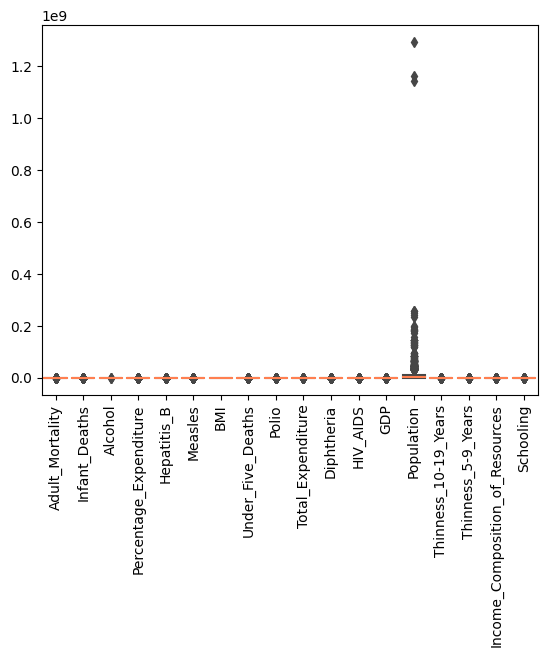

In [19]:
def plot_box(df):
    sns.boxplot(data=df, showcaps=False, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"}, orient='v')
    plt.xticks(rotation=90)
    plt.show()

# plot without non-numeric columns
plot_box(X_train_imputed.drop(['Country', 'Status', 'Year'], axis=1))

<div class="alert alert-block alert-warning">
    as we can see the population has the furthest outliers compared to other features, Let us alos plot without the 'population' feature to visualize any other feature outliers
</div>

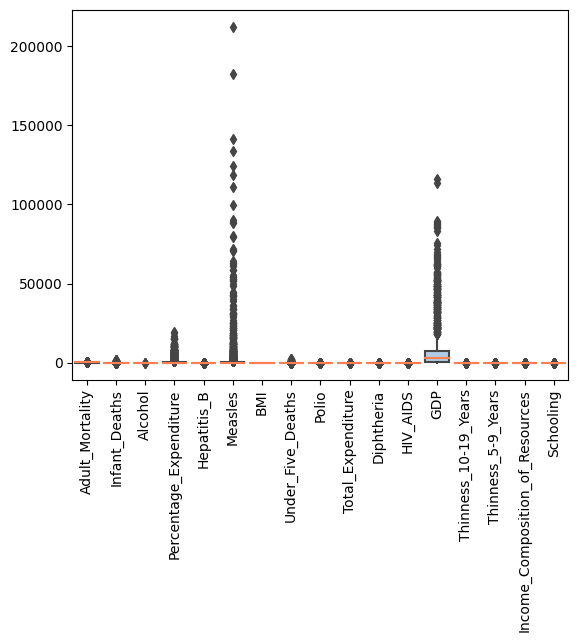

In [20]:
# plot without non-numeric columns and 'Population'
plot_box(X_train_imputed.drop(['Country', 'Status', 'Year', 'Population'], axis=1))

<div class="alert alert-block alert-warning">
    There are considerable outliers present in 'Measels' and 'GDP' features
</div>

<div class="alert alert-block alert-info">
    Using Interquartile Range formula to deal with outliers
</div>

In [21]:
def remove_outliers(data, col_name):
    percentile25 = data[col_name].quantile(0.25)
    percentile75 = data[col_name].quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    data[data[col_name] > upper_limit]
    data[data[col_name] < lower_limit]
    
    data = data[data[col_name] < upper_limit]
    
    return data

In [22]:
X_train_imputed_outlier_removed = remove_outliers(X_train_imputed, 'Population')
X_train_imputed[~X_train_imputed['Country'].isin(X_train_imputed_outlier_removed['Country'])]['Country'].unique()

array([], dtype=object)

In [23]:
X_train_imputed_outlier_removed = remove_outliers(X_train_imputed, 'GDP')
X_train_imputed[~X_train_imputed['Country'].isin(X_train_imputed_outlier_removed['Country'])]['Country'].unique()

array([], dtype=object)

In [24]:
X_train_imputed_outlier_removed = remove_outliers(X_train_imputed, 'Measles')
X_train_imputed[~X_train_imputed['Country'].isin(X_train_imputed_outlier_removed['Country'])]['Country'].unique()

array(['China', 'India', 'Indonesia'], dtype=object)

<div class="alert alert-block alert-warning">
 As we can see removing outlier in the 'Measels' feature has an effect on 'Country' feature, thus the outlier removals will be only be carried out on 'Population' and 'GDP' features.
</div>

In [25]:
X_train_imputed_outlier_removed = remove_outliers(X_train_imputed, 'Population')
X_train_imputed_outlier_removed = remove_outliers(X_train_imputed_outlier_removed, 'GDP')
y_train = y_train[X_train_imputed_outlier_removed.index]
print(X_train_imputed.shape)
print(X_train_imputed_outlier_removed.shape)
X_train_imputed[~X_train_imputed['Country'].isin(X_train_imputed_outlier_removed['Country'])]['Country'].unique()

(2342, 21)
(1966, 21)


array([], dtype=object)

<div class="alert alert-block alert-info">
 Carrying out the same outlier removal process for dropeed set as well
</div>

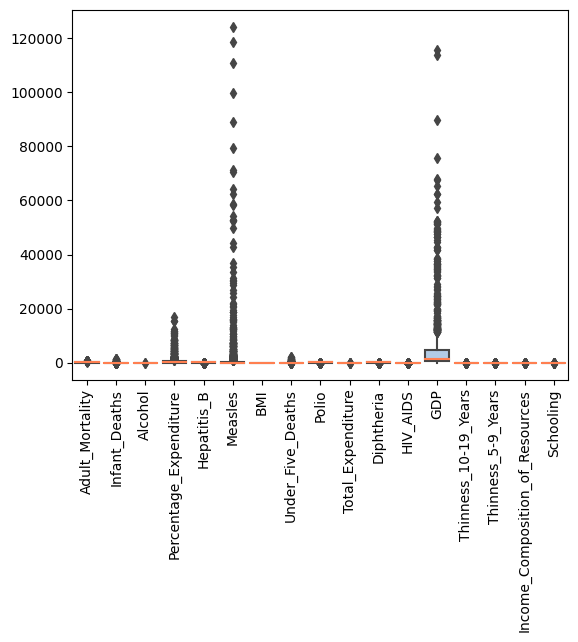

In [26]:
plot_box(X_train_dropped.drop(['Country', 'Status', 'Year', 'Population'], axis=1))

In [27]:
X_train_dropped_outlier_removed = remove_outliers(X_train_dropped, 'Population')
y_train_dropped = y_train_dropped[X_train_dropped_outlier_removed.index]
print(X_train_dropped.shape)
print(X_train_dropped_outlier_removed.shape)
X_train_dropped[~X_train_dropped['Country'].isin(X_train_dropped_outlier_removed['Country'])]['Country'].unique()

(1325, 21)
(1143, 21)


array([], dtype=object)

<div class="alert alert-block alert-warning">
    Let us now plot the correlation plot to see how the features are correlated with the target variable.
</div>

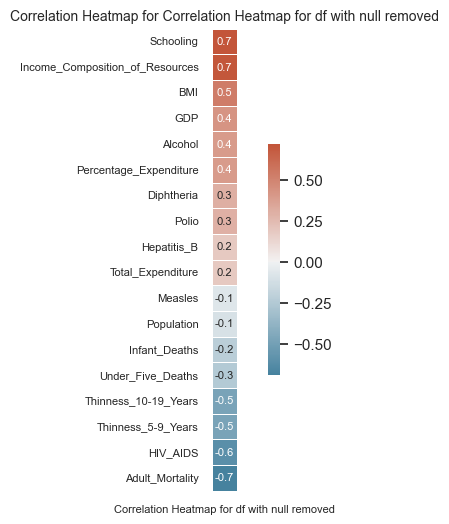

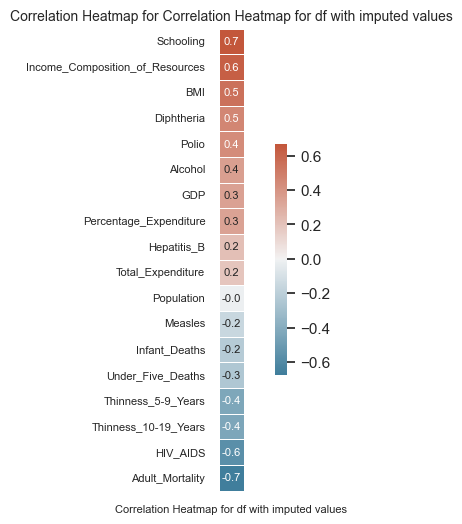

In [28]:
def plot_correlation(df_target, df_features, df_name, threshold=0.0):
    # calculate the correlation matrix
    corr = df_features.corrwith(df_target)

    # identify highly correlated features
    highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)
    highly_correlated_cols = corr[highly_correlated].sort_values(ascending=False).index.tolist()

    # plot the correlation heatmap
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr[highly_correlated_cols].to_frame(), cmap=sns.diverging_palette(230, 20, as_cmap=True),
                center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True, fmt=".1f", annot_kws={"size": 8},
                xticklabels=[df_name], yticklabels=highly_correlated_cols)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
plot_correlation(y_train_dropped, X_train_dropped_outlier_removed, "Correlation Heatmap for df with null removed")
plot_correlation(y_train, X_train_imputed_outlier_removed, "Correlation Heatmap for df with imputed values")

<div class="alert alert-block alert-info">
    According to the plots, we can see that the 'Schooling', 'Income composition of resources', 'Adult Mortality', 'HIV/AIDS' and 'BMI' features are highly correlated with the target variable 'Life expectancy'. We can also see that the 'Population' and 'GDP' features are not correlated with the target variable.
</div>

<div class="alert alert-block alert-info">
    We will remove features with low correlation with the target variable.
</div>

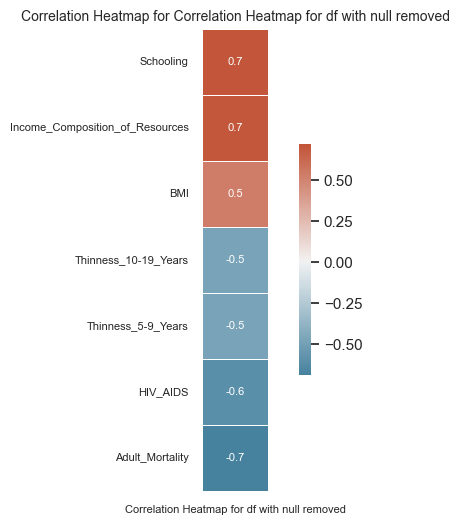

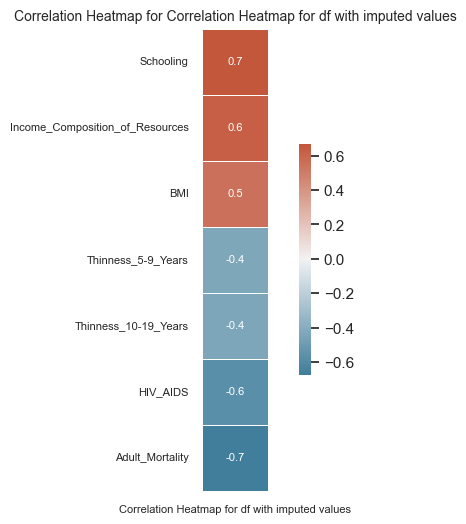

In [29]:
X_train_dropped_outlier_removed_correlated = X_train_dropped_outlier_removed.drop(['Population', 'Measles', 'Infant_Deaths', 'Under_Five_Deaths', 'Total_Expenditure', 'Hepatitis_B', 'Percentage_Expenditure', 'GDP', 'Alcohol', 'Polio', 'Diphtheria'], axis=1)
X_train_imputed_outlier_removed_correlated = X_train_imputed_outlier_removed.drop(['Population', 'Measles', 'Infant_Deaths', 'Under_Five_Deaths', 'Total_Expenditure', 'Hepatitis_B', 'Percentage_Expenditure', 'GDP', 'Alcohol', 'Polio', 'Diphtheria'], axis=1)
X_test = X_test.drop(['Population', 'Measles', 'Infant_Deaths', 'Under_Five_Deaths', 'Total_Expenditure', 'Hepatitis_B', 'Percentage_Expenditure', 'GDP', 'Alcohol', 'Polio', 'Diphtheria'], axis=1)

plot_correlation(y_train_dropped, X_train_dropped_outlier_removed_correlated, "Correlation Heatmap for df with null removed")
plot_correlation(y_train, X_train_imputed_outlier_removed_correlated, "Correlation Heatmap for df with imputed values")

<div class="alert alert-block alert-info">
  Here we standardize the data and categorical encode the string data
</div>

In [30]:
# standardize and label encode the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# seperate non-categorical features
X_train_imputed_outlier_removed_correlated_non_categorical = X_train_imputed_outlier_removed_correlated.drop(['Country', 'Status', 'Year'], axis=1)
X_train_dropped_outlier_removed_correlated_non_categorical = X_train_dropped_outlier_removed_correlated.drop(['Country', 'Status', 'Year'], axis=1)

# standardize non-categorical features
scaler = StandardScaler()
X_train_imputed_outlier_removed_correlated_non_categorical_scaled = scaler.fit_transform(X_train_imputed_outlier_removed_correlated_non_categorical)
X_train_dropped_outlier_removed_correlated_non_categorical_scaled = scaler.fit_transform(X_train_dropped_outlier_removed_correlated_non_categorical)

# label encode categorical features
le = LabelEncoder()
X_train_imputed_outlier_removed_correlated_categorical = X_train_imputed_outlier_removed_correlated[['Country', 'Status', 'Year']].apply(le.fit_transform)
X_train_dropped_outlier_removed_correlated_categorical = X_train_dropped_outlier_removed_correlated[['Country', 'Status', 'Year']].apply(le.fit_transform)

# combine categorical and non-categorical features
X_train_imputed_outlier_removed_correlated_scaled = np.concatenate((X_train_imputed_outlier_removed_correlated_categorical, X_train_imputed_outlier_removed_correlated_non_categorical_scaled), axis=1)
X_train_dropped_outlier_removed_correlated_scaled = np.concatenate((X_train_dropped_outlier_removed_correlated_categorical, X_train_dropped_outlier_removed_correlated_non_categorical_scaled), axis=1)

# create a dataframe with the standardized and label encoded data
X_train_iocs = pd.DataFrame(X_train_imputed_outlier_removed_correlated_scaled, columns=X_train_imputed_outlier_removed_correlated.columns)
X_train_docs = pd.DataFrame(X_train_dropped_outlier_removed_correlated_scaled, columns=X_train_dropped_outlier_removed_correlated.columns)

# standardize and label encode the test data
X_test_non_categorical = X_test.drop(['Country', 'Status', 'Year'], axis=1)
X_test_non_categorical_scaled = scaler.transform(X_test_non_categorical)
X_test_categorical = X_test[['Country', 'Status', 'Year']].apply(le.transform)
X_test_scaled = np.concatenate((X_test_categorical, X_test_non_categorical_scaled), axis=1)
X_test_s = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# print shape of dataframes against target
print(X_train_iocs.shape, y_train.shape)
print(X_train_docs.shape, y_train_dropped.shape)
print(X_test_s.shape, y_test.shape)

(1966, 10) (1966,)
(1143, 10) (1143,)
(324, 10) (324,)


<div class="alert alert-block alert-info">
    <h2>Pre-processed testing and training pairs of the dataset</h2>
    Here we list the pre-processed testing and training pairs of the dataset that can be used for analysis
</div>

<div class="alert alert-block alert-success">
    Imputed
    <blockquote>
    X_train_iocs<br>
    y_train<br>
    </blockquote>
   <br>
   <br>
    Dropped
    <blockquote>
    X_train_docs<br>
    y_train_dropped
    </blockquote>
   <br>
   <br>
    Testing
    <blockquote>
    X_test_s<br>
    y_test
    </blockquote>
</div>

<div class="alert alert-block alert-info">
 Visualising train and test sets
</div>

In [31]:
X_train_iocs.head()

,Country,Year,Status,Adult_Mortality,BMI,HIV_AIDS,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
0,141.0,1.0,12.0,-0.406347,1.106079,-0.344275,-0.704048,-0.701454,0.847759,0.780385
1,104.0,1.0,2.0,0.012638,-0.518858,-0.344275,0.667621,0.642341,0.424336,0.296469
2,173.0,1.0,8.0,1.569998,-0.865240,0.990508,0.525724,0.503328,0.141860,0.135675
3,68.0,1.0,15.0,0.771555,-0.523952,0.222551,0.478425,0.433821,-0.896341,-0.768146
4,115.0,0.0,9.0,-0.825332,1.411710,-0.344275,-1.129739,-1.118495,1.492976,2.490222


In [32]:
X_train_docs.head()

,Country,Year,Status,Adult_Mortality,BMI,HIV_AIDS,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
0,106.0,1.0,12.0,-0.351596,1.002036,-0.318936,-0.606520,-0.615102,0.745702,0.677731
1,79.0,1.0,2.0,0.066276,-0.619592,-0.318936,0.784446,0.749518,0.301468,0.142384
2,123.0,1.0,0.0,-0.461977,0.483521,-0.318936,0.472678,0.420127,0.105793,0.249454
3,127.0,1.0,11.0,-1.155802,1.037620,-0.303331,-0.534574,-0.520990,0.571181,0.998939
4,117.0,1.0,13.0,-0.059874,0.020925,-0.303331,-0.246788,-0.238655,-0.047573,-0.321583


In [33]:
X_test_s.head()

,Country,Year,Status,Adult_Mortality,BMI,HIV_AIDS,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_of_Resources,Schooling
0,100.0,1.0,9.0,2.325799,0.426051,3.330096,0.693294,1.040357,-0.096427,0.249794
1,9.0,1.0,11.0,-1.198533,-1.139975,-0.276266,2.941899,3.016600,-0.524024,-0.968323
2,74.0,1.0,12.0,-1.222839,-1.631277,-0.276266,-0.621928,-0.620528,0.875385,1.073814
3,50.0,1.0,7.0,-1.101310,-1.211623,-0.238104,4.723813,4.866700,-0.518471,-0.789188
4,15.0,1.0,13.0,-1.239042,0.850823,-0.276266,-0.515862,-0.515409,0.531086,0.751371


<div class="alert alert-block alert-info">
    <h3>Section 02 - Modeling<h3>
</div>

<div class="alert alert-block alert-info">
  For the initial model, we are using Linear Regression model to predict and meassure the accuracy using R2 score
</div>

In [53]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# imputed
lr = LinearRegression()
lr.fit(X_train_iocs, y_train)

y_pred = lr.predict(X_test_s)

r2_score(y_test, y_pred)
print("LR - R2 score for test using \033[4mimputed\033[0m and outlier removed data: ", r2_score(y_test, y_pred))


# dropped
lr = LinearRegression()
lr.fit(X_train_docs, y_train_dropped)

y_pred = lr.predict(X_test_s)

print("LR - R2 score for test using \033[4mdropped\033[0m and outlier removed data: ", r2_score(y_test, y_pred))

LR - R2 score for test using imputed and outlier removed data:  0.7546659020624065
LR - R2 score for test using dropped and outlier removed data:  0.8101681926388482


<div class="alert alert-block alert-success">
 As we can see the Linear Regression model achieves higher R2 score on the set with dropped null values compared to the imputed set
</div>

<div class="alert alert-block alert-info">
 Second model with Random Forest Regressor
</div>

In [54]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# imputed
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train_iocs, y_train)

y_pred = rf.predict(X_test_s)

r2_score(y_test, y_pred)
print("RF - R2 score for test using \033[4mimputed\033[0m and outlier removed data: ", r2_score(y_test, y_pred))


# dropped
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train_docs, y_train_dropped)

y_pred = rf.predict(X_test_s)

print("RF - R2 score for test using \033[4mdropped\033[0m and outlier removed data: ", r2_score(y_test, y_pred))

RF - R2 score for test using imputed and outlier removed data:  0.8806913293659521
RF - R2 score for test using dropped and outlier removed data:  0.9351579496457224


<div class="alert alert-block alert-success">
 As with the earlier linear model, the random forest model also achieves higher R2 score with the dropped set
</div>

<div class="alert alert-block alert-info">
 Performing cross validation
</div>

In [47]:
# cross validation
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(), '\n')


# linear regression CV

# cross validation for imputed and outlier removed data
lr = LinearRegression()
scores = cross_val_score(lr, X_train_iocs, y_train, cv=5, scoring='r2')

print("LR - Cross validation scores for \033[4mimputed\033[0m and outlier removed data: ")
display_scores(scores)

# cross validation for dropped and outlier removed data
lr = LinearRegression()
scores = cross_val_score(lr, X_train_docs, y_train_dropped, cv=5, scoring='r2')

print("LR - Cross validation scores for \033[4mdropped\033[0m and outlier removed data: ")
display_scores(scores)


# random forest CV

# cross validation for imputed and outlier removed data
rf1 = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
scores = cross_val_score(rf1, X_train_iocs, y_train, cv=5, scoring='r2')

print("RF - Cross validation scores for \033[4mimputed\033[0m and outlier removed data: ")
display_scores(scores)

# cross validation for dropped and outlier removed data
rf1 = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
scores = cross_val_score(rf1, X_train_docs, y_train_dropped, cv=5, scoring='r2')

print("RF - Cross validation scores for \033[4mdropped\033[0m and outlier removed data: ")
display_scores(scores)

LR - Cross validation scores for imputed and outlier removed data: 
Scores: [0.7330498  0.75451042 0.74456593 0.74395551 0.76509569]
Mean: 0.7482354714032041
Standard deviation: 0.010826174294190334 

LR - Cross validation scores for dropped and outlier removed data: 
Scores: [0.82387091 0.79093158 0.8148537  0.80137283 0.80570667]
Mean: 0.8073471390575895
Standard deviation: 0.011289262872246202 

RF - Cross validation scores for imputed and outlier removed data: 
Scores: [0.94089931 0.94847434 0.94267543 0.9637044  0.95620546]
Mean: 0.9503917854594907
Standard deviation: 0.008536397281556809 

RF - Cross validation scores for dropped and outlier removed data: 
Scores: [0.94968332 0.94831527 0.936535   0.96049633 0.96538243]
Mean: 0.9520824706261326
Standard deviation: 0.010093102577210628 



<div class="alert alert-block alert-success">
 Random forest regressor model achieves a 0.95 R2 score on the training set on both sets of training data.
</div>

<div class="alert alert-block alert-info">
    <h3>Section 03 - Tuning<h3>
</div>

<div class="alert alert-block alert-info">
    Let us now use grid search to further tune the hyperparameters of the random forest model and test on the test set
</div>

<div class="alert alert-block alert-info">
    Imputed
    </div>

In [82]:
# grid search
from sklearn.model_selection import GridSearchCV

# random forest grid search

# imputed
param_grid = [ {'n_estimators': [50, 100, 200], 'max_features': [2, 4, 6, 10], 'max_depth': [5, 10, 20]}, {'bootstrap': [False, True], 'n_estimators': [50, 100, 200], 'max_features': [2, 4, 6, 10], 'max_depth': [5, 10, 20]} ]

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_iocs, y_train)

print("RF - Grid search for \033[4mimputed\033[0m and outlier removed data: ")
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print('\n')

RF - Grid search for imputed and outlier removed data: 
{'bootstrap': False, 'max_depth': 20, 'max_features': 4, 'n_estimators': 200}
RandomForestRegressor(bootstrap=False, max_depth=20, max_features=4,
                      n_estimators=200, random_state=42)
0.9596288934016795




<div class="alert alert-block alert-info">
    According to the grid search, max_depth of 20, max_features of 4, n_estimators of 200, achieves the highest training accuracy on the random forest model. Let us get the test accuracy using the best model parameters.
    </div>

In [83]:
# predict using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_s)

print("RF - R2 score for test data using best params trained on imputed data: ", r2_score(y_test, y_pred))

RF - R2 score for test data using best params trained on imputed data:  0.8809841670248747


<div class="alert alert-block alert-success">
    The best model trained using imputed train data achieves a R2 score of 0.88 on the test set

<div class="alert alert-block alert-info">
    Let us now find the best hyperparameter combination on the dropped train data and test the accuracy on the test set

In [79]:
# dropped
param_grid = [ {'n_estimators': [50, 100, 200], 'max_features': [2, 4, 6, 10], 'max_depth': [5, 10, 20]}, {'bootstrap': [False, True], 'n_estimators': [50, 100, 200], 'max_features': [2, 4, 6, 10], 'max_depth': [5, 10, 20]} ]

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_docs, y_train_dropped)

print("RF - Grid search for \033[4mdropped\033[0m and outlier removed data: ")
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print('\n')

RF - Grid search for dropped and outlier removed data: 
{'bootstrap': False, 'max_depth': 20, 'max_features': 4, 'n_estimators': 200}
RandomForestRegressor(bootstrap=False, max_depth=20, max_features=4,
                      n_estimators=200, random_state=42)
0.9594002857310315




In [81]:
# predict using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_s)

print("RF - R2 score for test data using best params trained on dropped data: ", r2_score(y_test, y_pred))

RF - R2 score for test data using best params trained on dropped data:  0.9419565512422168


<div class="alert alert-block alert-success">
    As we can see the best model trained with the dropped train set scores a higher R2 score of 0.94 on the test set
    </div>

<div class="alert alert-block alert-info">
    <h3>Section 04 - Using Best features<h3>
</div>

<div class="alert alert-block alert-info">
    For the final step, let us create a seperate set with first dropping null values, then removing ucorrelated features (since as above removing outliers is unnecessary since most of the outliers are present in uncorrelated features), scaling and testing with best params from random forest model
</div>

In [141]:
# split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

# drop na
X_train_2 = X_train_2.dropna()
y_train_2 = y_train_2[X_train_2.index]
X_test_2 = X_test_2.dropna()
y_test_2 = y_test_2[X_test_2.index]

# remove uncorrelated features
X_train_2 = X_train_2.drop(['Population', 'Measles', 'Infant_Deaths', 'Under_Five_Deaths', 'Total_Expenditure', 'Hepatitis_B', 'Percentage_Expenditure', 'GDP', 'Alcohol', 'Polio', 'Diphtheria'], axis=1)
y_train_2 = y_train_2[X_train_2.index]
X_test_2 = X_test_2.drop(['Population', 'Measles', 'Infant_Deaths', 'Under_Five_Deaths', 'Total_Expenditure', 'Hepatitis_B', 'Percentage_Expenditure', 'GDP', 'Alcohol', 'Polio', 'Diphtheria'], axis=1)
y_test_2 = y_test_2[X_test_2.index]

# scale and categorize
scaler2 = StandardScaler()
le2 = LabelEncoder()

# seperate categorical and numerical features
X_train_2_num = X_train_2.drop(['Country', 'Status', 'Year'], axis=1)
X_test_2_num = X_test_2.drop(['Country', 'Status', 'Year'], axis=1)

X_train_2_num_scaled = scaler.fit_transform(X_train_2_num)
X_test_2_num_scaled = scaler.transform(X_test_2_num)

X_train_2_cat = X_train_2[['Country', 'Status', 'Year']].apply(le.fit_transform)
X_test_2_cat = X_test_2[['Country', 'Status', 'Year']].apply(le.fit_transform)

# combine
X_train_2 = np.concatenate((X_train_2_cat, X_train_2_num_scaled), axis=1)
X_test_2 = np.concatenate((X_test_2_cat, X_test_2_num_scaled), axis=1)

# train using best rf params
rf3 = RandomForestRegressor(bootstrap=False, max_depth=20, max_features=4, n_estimators=200, random_state=42)
rf3.fit(X_train_2, y_train_2)

# predict
y_pred_2 = rf3.predict(X_test_2)

# r2 score
print("RF - R2 score for test data: ", r2_score(y_test_2, y_pred_2))

RF - R2 score for test data:  0.9730908766957272


<div class="alert alert-block alert-success">
    As we can see the final R2 score for the best random forest model trained on best correlated features using the dropped null data achives a score of 0.97
</div>